# Project - The Restaurant Problem
# Notebook for hypothetical business problem related to opening a restaurant in New York City

#### Introduction / Business Problem Section

A client targets to open a food place that will be situated in New York area but he is not able to figure out what type of eating place will be best welcome by New Yorker and also the choices of location so that his investment more secure and the ROI will be higher.

First of all, questions have been asked to the investor in order to better understand his requirement and also help to find out appropriate suggestion for him. Here are the summary of those questions and answer.

##### Question 1: What kind of restaurant you are target to invest?

Answer: It is quite open and really depends on which kinds of food that New Yorker usually like to try. It is better to have some study to find out what New Yorker like most.

##### Question 2: What is your expect location for the restaurant?

Answer: The most popular the better. I will target to open a spectacular type of restaurant that attract people eyeball and also easy reach by my customers. As a business point of view, area that has a lot of hot spot venues will grab people attention. I am not affair of competition. As long as my restaurant has special features, it is better to open in a crowded place to draw more attention.

##### Question 3: What is your target customer or type of customer?

Answer: Well, it is better to suitable for whole family gathering and enjoy their meal in my restaurant. I do not mean not welcome to individual or couples but really prefer to have a place for family members suitable for kids, parent and their aged family members are all welcome.

##### Question 4: Do you have any prefer diet type provide?

Answer: Since I want to host a family style customers, variety of food type could be considered. However, I also want to understand what kinds of food is most popular be accepted in the target area that the restaurant will be located. Taking reference to surrounding venues will always be a good practice.

By collecting the requirement from our investor, we can collect data from possible source including web pages, from map and also from location based data provider foursquare.com and analysis with scientific method to find some answer for the investor.

## Data Section

There are 5 boroughs withing New York namely Bronx, Brooklyn (Kings County), Manhattan (New York County), Queens and New York City. In order to find a suitable place for the new restaurant, an understand of the population size and density of the 5 boroughs has to be found out. Luckily, a website (https://en.wikipedia.org/wiki/Demographics_of_New_York_City) contains valuable data about the population size and density about New York city. That exactly what we need as the basic information for choosing the highest population density to be the potential target to open the restaurant as it provides a better customers pool.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/Demographics_of_New_York_City', width=700, height=600)

Another important data source will be from FOURSQUARE website. By using API call to find out the “Top Picks” and “Food” venues from the neighborhoods of the 5 boroughs, a list of favor activities and food can help to decide what type of restaurant will be best suite New Yorker. The key idea is to suggest a fusion place to provide the most favor diet together with most interested activity to customers. That aims to provide a good place for New Yorker to join together with their family and friends and enjoy their preferred foods. 

##### Bronx

In [2]:
Image(url="https://drive.google.com/uc?authuser=0&id=1Duocl6ykve_3klVdGusZ4oucBBr1Lfn9")

In [3]:
Image(url="https://drive.google.com/uc?authuser=0&id=1Dk5po9RX802X8vij8uBbYyRoDkx11Xfe")

##### Brooklyn (Kings County)

In [4]:
Image(url="https://drive.google.com/uc?authuser=0&id=1vJ1Z3DDSh5WZiq-VAAZOM7FHqvoj02G9")

In [5]:
Image(url="https://drive.google.com/uc?authuser=0&id=19GLBIhsBcXg6Kw6xCoUKz92n7x2UG1M-")

##### Manhattan (New York County)

In [6]:
Image(url="https://drive.google.com/uc?authuser=0&id=1c2hUS6jppbKa-8AT1OWvIrxsCmrQPO6C")

In [7]:
Image(url="https://drive.google.com/uc?authuser=0&id=1Cf3Rp7nvrg1iTUHx4xnSn_o2SLcplxs6")

##### New York City

In [8]:
Image(url="https://drive.google.com/uc?authuser=0&id=1h02TKwr8cs4Z7CW9d32l1peDmL4vYPyu")

In [9]:
Image(url="https://drive.google.com/uc?authuser=0&id=13Imb_LQL6TVg0QZOB2d_vmx3jX9k_-Jj")

##### Queens

In [11]:
Image(url="https://drive.google.com/uc?authuser=0&id=1uoeTR7O8CkM0uEUqO5-FeLsotC6Fkepc")

In [12]:
Image(url="https://drive.google.com/uc?authuser=0&id=1ZGxUKEPIFra8829Xm271fyr6_lju2PHl")

Both the population data from wikipedia and venues data from FOURSQUARE will be analysed using various analytic tools to find out the best combination of food and activity that New Yorker love to have and the best location that the restaurant will be placed. With such processes, it is believe that the investor request can be fulfilled. 

## Data Preparation for Population Status of New York
### Finding data from webpage to dataframe

#### Import Pandas, Numpy, BeautifulSoup, Folium and Matplotlib library

In [ ]:
# pandas and numpy library
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize

# beautifulsoup library
import requests 
from bs4 import BeautifulSoup

# folium library
!conda install -c conda-forge folium=0.6.0 --yes
import folium
print('Folium installed and imported!')

# matplotlib library
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

#### Scraping webpage content for New York City population

In [2]:
# set the web link to be opened    
nyc_url='https://en.wikipedia.org/wiki/Demographics_of_New_York_City'
# open with GET method 
resp=requests.get(nyc_url) 
if resp.status_code==200: # http_respone 200 means OK status
    # we need a parser,Python built-in HTML parser is enough . 
    nyc_webpage=BeautifulSoup(resp.text,'html.parser')  
    print("The web page is successfully opened") 
else: 
    print("There is error in opening the web page!") 

The web page is successfully opened


In [3]:
# scrape the require section
# set up heading
df_newyork = pd.DataFrame(columns = ['Borough', 'County', '2017_Population',
                             'Area_mile', 'Area_km',
                             'Population_Density_permile', 'Population_Density_perkm'])

# get population data of New York city from sub-section 
list = nyc_webpage.find_all('td')
t = [None] * 35
idx = 0
j = 0
#print(len(list))
for item in list:
    if (j < 35):
        t[j] = item.text.rstrip().lstrip()
        j+=1
for i in range(0,5):
    df_newyork.loc[i] = [t[i*7], t[i*7+1], int(t[i*7+2].replace(',','')), float(t[i*7+3].replace(',','')),
                        float(t[i*7+4].replace(',','')), int(t[i*7+5].replace(',','')),
                        int(t[i*7+6].replace(',',''))]
df_newyork

,Borough,County,2017_Population,Area_mile,Area_km,Population_Density_permile,Population_Density_perkm
0,Manhattan,New York,1664727,22.83,59.13,72033,27826
1,The Bronx,Bronx,1471160,42.10,109.04,34653,13231
2,Brooklyn,Kings,2648771,70.82,183.42,37137,14649
3,Queens,Queens,2358582,108.53,281.09,21460,8354
4,Staten Island,Richmond,479458,58.37,151.18,8112,3132


#### Prepare the population density data of New York City and display in a choropleth map

##### Get the latitude and longitude values of New York City from webpage

In [4]:
nyc_url='https://latitude.to/articles-by-country/us/united-states/11/new-york-city'
# open with GET method 
resp=requests.get(nyc_url) 
if resp.status_code==200: # http_respone 200 means OK status
    # we need a parser,Python built-in HTML parser is enough . 
    nyc_webpage=BeautifulSoup(resp.text,'html.parser')  
    # get the class="coord DD" for the coordinate
    div = nyc_webpage.find('div', attrs={'class': 'coord DD'})
    coor = div.findChildren()[1].get('value')
    nyc_lat = float(coor.split()[0])
    nyc_long = float(coor.split()[1])
    print('Latitude and longitude values of Upper West Side are {}, {}.'.format(nyc_lat, nyc_long)) 
else: 
    print("There is error in opening the web page!")

Latitude and longitude values of Upper West Side are 40.7166638, -74.0.


In [5]:
# download brough boundary of New York City 
!wget --quiet http://data.beta.nyc//dataset/3bf5fb73-edb5-4b05-bb29-7c95f4a727fc/resource/6df127b1-6d04-4bb7-b983-07402a2c3f90/download/f4129d9aa6dd4281bc98d0f701629b76nyczipcodetabulationareas.geojson -O nyc.json
nyc_geo = r'nyc.json'

print('New Yord City GeoJSON file downloaded!')

New Yord City GeoJSON file downloaded!


In [13]:
# prepare a choropleth map centered around New York City
nyc_map = folium.Map(location=[nyc_lat, nyc_long], zoom_start=10,  tiles='Mapbox Bright')

# generate choropleth map
nyc_map.choropleth(
    geo_data=nyc_geo,
    data=df_newyork,
    columns=['Borough', 'Population_Density_perkm'],
    key_on='feature.properties.borough',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population Density of New York City Boroughs'
)

# display NYC choropleth map
nyc_map

NameError: name 'folium' is not defined

##### Prepare a bar chart to graphically understand the population density in New York City

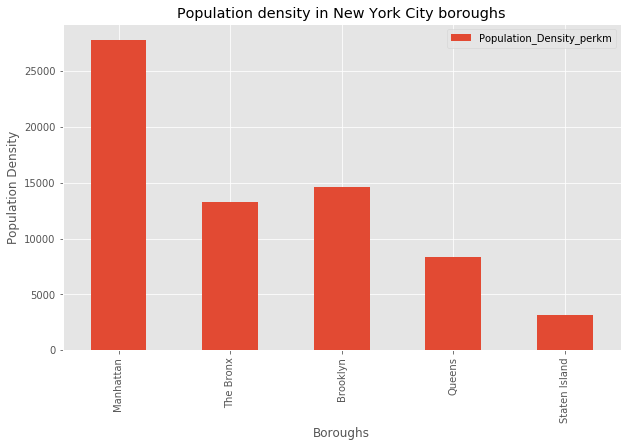

In [7]:
# prepare the dataset
df_nycden = df_newyork.copy()
columns = ['County', '2017_Population', 'Area_mile', 'Area_km', 'Population_Density_permile']
df_nycden.drop(columns, inplace=True, axis=1)
df_nycden.set_index('Borough', inplace=True)

# plot data
df_nycden.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Boroughs') # add x-label to the plot
plt.ylabel('Population Density') # add y-label to the plot
plt.title('Population density in New York City boroughs')

plt.show()

### It is obvious that Manhattan get the highest population density
#### Then will turn our focus on further study Manhattan area

##### Getting the population csv data for Manhattan neighborhoods from webpage
##### data.cityofnewyork.us/City-Government/Manhattan-populations-by-neighborhood/8m6s-esnp

In [8]:
# import the population csv data
    
!wget --quiet -O man_neigh_pop.csv "https://drive.google.com/uc?authuser=0&id=1oteKFvh4k9o3aH3gbdLNC0Oq1F0-BI0h&export=download"

df_man = pd.read_csv('man_neigh_pop.csv')
df_man.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Manhattan,2010,61,MN01,Marble Hill-Inwood,46746
1,Manhattan,2010,61,MN03,Central Harlem North-Polo Grounds,75282
2,Manhattan,2010,61,MN04,Hamilton Heights,48520
3,Manhattan,2010,61,MN06,Manhattanville,22950
4,Manhattan,2010,61,MN09,Morningside Heights,55929


#### Display the population data in a map
##### Prepare a choropleth map centered around Manhattan

##### Get the neighborhood's latitude and longitude values of Manhattan

In [9]:
man_url='https://latitude.to/articles-by-country/us/united-states/160/manhattan'
# open with GET method 
resp=requests.get(man_url) 
if resp.status_code==200: # http_respone 200 means OK status
    # we need a parser,Python built-in HTML parser is enough . 
    man_webpage=BeautifulSoup(resp.text,'html.parser')  
    # get the class="coord DD" for the coordinate
    div = man_webpage.find('div', attrs={'class': 'coord DD'})
    coor = div.findChildren()[1].get('value')
    man_lat = float(coor.split()[0])
    man_long = float(coor.split()[1])
    print('Latitude and longitude values of Manhattan are {}, {}.'.format(man_lat, man_long)) 
else: 
    print("There is error in opening the web page!") 

Latitude and longitude values of Manhattan are 40.723663772, -73.989829374.


In [10]:
# download brough boundary of Manhattan
!wget --quiet -O man.json "https://drive.google.com/uc?authuser=0&id=1NIduULTbs3o73tlQV_Y2xkyQQQKs29PV&export=download"
man_geo = r'man.json'

print('Manhattan GeoJSON file downloaded!')

Manhattan GeoJSON file downloaded!


In [11]:
# prepare a choropleth map centered around Manhattan
import json

man_map = folium.Map(location=[man_lat, man_long], zoom_start=11,  tiles='Mapbox Bright')
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
man_map.choropleth(
    geo_data=man_geo,
    data=df_man,
    columns=['NTA Code', 'Population'],
    key_on='feature.properties.ntacode',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Population of Manhattan Neighborhoods'
)
man_map

##### Prepare a bar chart to graphically understand the population distribution

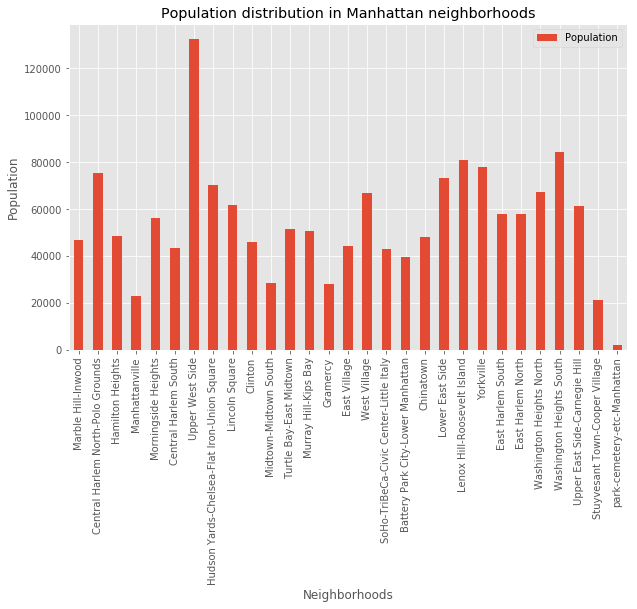

In [12]:
# prepare the dsataset
df_manpop = df_man.copy()
columns = ['Year', 'FIPS County Code', 'Borough', 'NTA Code']
df_manpop.drop(columns, inplace=True, axis=1)
df_manpop.set_index('NTA Name', inplace=True)

# plot data
df_manpop.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Neighborhoods') # add x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population distribution in Manhattan neighborhoods')

plt.show()

### From the population information of Manhattan neighborhoods, the restaurant will target to locate at Upper West Side (MN12) of Manhattan which shows the highest potential customers there.

### Using FOURSQUAR to find out the most favious food and place that Upper West Side residence love to have
##### Define Foursquare Credentials

In [13]:
CLIENT_ID = 'C51V25TSOEAIU2DQRLPD1OFV4Z3FPI4V4OMGLF4SZBSXZQMV'
CLIENT_SECRET = 'TQI1WB4CUJKIAZA3W0NU0BJCR2WDZ2SI1FKQN2MTKCBQGMI2'
VERSION = '20180605' # Foursquare API version

print('The credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

The credentails:
CLIENT_ID: C51V25TSOEAIU2DQRLPD1OFV4Z3FPI4V4OMGLF4SZBSXZQMV
CLIENT_SECRET:TQI1WB4CUJKIAZA3W0NU0BJCR2WDZ2SI1FKQN2MTKCBQGMI2


##### Get the neighborhood's latitude and longitude values of Upper West Side from webpage

In [14]:
# access htps://latitude.to site to retrieve the coordinate of Upper West Side 
uws_url='https://latitude.to/articles-by-country/us/united-states/2146/upper-west-side'
# open with GET method 
resp=requests.get(uws_url) 
if resp.status_code==200: # http_respone 200 means OK status
    # we need a parser,Python built-in HTML parser is enough . 
    uws_webpage=BeautifulSoup(resp.text,'html.parser')  
    # get the class="coord DD" for the coordinate
    div = uws_webpage.find('div', attrs={'class': 'coord DD'})
    coor = div.findChildren()[1].get('value')
    uws_lat = float(coor.split()[0])
    uws_long = float(coor.split()[1])
    print('Latitude and longitude values of Upper West Side are {}, {}.'.format(uws_lat, uws_long)) 
else: 
    print("There is error in opening the web page!") 

Latitude and longitude values of Upper West Side are 40.785496858, -73.971829446.


##### Define a function for extracting category of found venues

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Get the top 100 food venues that are in Upper West Side within a radius of 500 meters.

In [16]:
LIMIT = 100
radius = 500 # meters
query = 'Top'
# create URL
#https://foursquare.com/explore?mode=url&ne=22.291598%2C114.159075&q=Food&sw=22.279189%2C114.141523
#ENDPOINT: venues/explore 
#PARAMETERS: near = San Francisco; query = Tea Shop
url = 'https://api.foursquare.com/v2/venues/explore?&query={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    query,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    uws_lat, 
    uws_long, 
    radius, 
    LIMIT)
food_results = requests.get(url).json()

##### Use get_category_type function from the Foursquare lab to form food venue data

In [17]:
# form the food venue dataframe
venues = food_results['response']['groups'][0]['items']
    
food_venues = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
food_venues = food_venues.loc[:, filtered_columns]

# filter the category for each row
food_venues['venue.categories'] = food_venues.apply(get_category_type, axis=1)

# clean columns
food_venues.columns = [col.split(".")[-1] for col in food_venues.columns]

# get which food venues categories group
grouped = food_venues.groupby('categories')['categories'].count().reset_index(name="count")

df_food = pd.DataFrame(grouped)
df_food.set_index('categories', inplace=True)
df_food.head()

,count
categories,
Bagel Shop,1
Bar,1
Breakfast Spot,1
Café,1
Coffee Shop,2


##### Prepare a bar chart to graphically understand the food place distribution

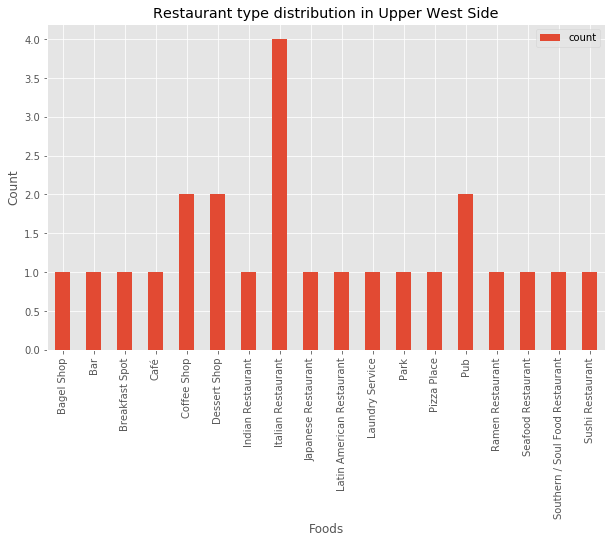

In [18]:
# plot data
df_food.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Foods') # add x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Restaurant type distribution in Upper West Side')

plt.show()

#### Get the top 100 fun venues that are in Upper West Side within a radius of 500 meters.

In [19]:
LIMIT = 100
radius = 500 # meters
query = 'Fun'
# create URL
#https://foursquare.com/explore?mode=url&ne=22.291598%2C114.159075&q=Food&sw=22.279189%2C114.141523
#ENDPOINT: venues/explore 
#PARAMETERS: near = San Francisco; query = Tea Shop
url = 'https://api.foursquare.com/v2/venues/explore?&query={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    query,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    uws_lat, 
    uws_long, 
    radius, 
    LIMIT)
fun_results = requests.get(url).json()

##### Use get_category_type function from the Foursquare lab to form fun venue data

In [20]:
# form the food venue dataframe
venues = fun_results['response']['groups'][0]['items']
fun_venues = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
fun_venues = fun_venues.loc[:, filtered_columns]

# filter the category for each row
fun_venues['venue.categories'] = fun_venues.apply(get_category_type, axis=1)

# clean columns
fun_venues.columns = [col.split(".")[-1] for col in fun_venues.columns]

# get which fun venues categories group
grouped = fun_venues.groupby('categories')['categories'].count().reset_index(name="count")

df_fun = pd.DataFrame(grouped)
df_fun.set_index('categories', inplace=True)
df_fun.head()

,count
categories,
Art Gallery,1
Bar,1
Dance Studio,3
Dog Run,1
Historic Site,3


##### Prepare a bar chart to graphically understand the fun area distribution

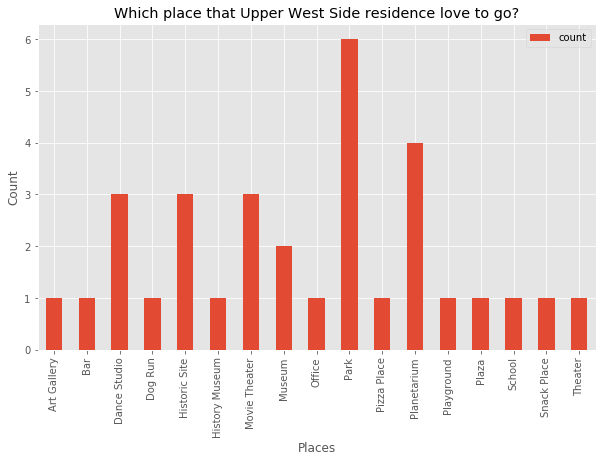

In [21]:
# plot data
df_fun.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Places') # add x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Which place that Upper West Side residence love to go?')

plt.show()

## Study Summary

### From the previous studies, there are some findings that help to make decision
#### 1. Manhattan have the highest population density throughout New York City.
#### 2. Upper West Side being the neighborhood area that has the highest population.
#### 3. Italian food is the most favor food that Upper West Side people like.
#### 4. Going to park is the most interest place that Upper West Side people like to visit.

## Conclusion
### It is suggested to open an Italian restaurant with the decoration theme of mimic a park environment will likely to fit the citizen taste.